In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as mno
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
data= pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [77]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [78]:
data.loc[data['Glucose']==0, 'Glucose']=np.NaN
data.loc[data['BloodPressure']==0, 'BloodPressure']=np.NaN
data.loc[data['SkinThickness']==0, 'SkinThickness']=np.NaN
data.loc[data['Insulin']==0, 'Insulin']=np.NaN
data.loc[data['BMI']==0, 'BMI']=np.NaN

In [79]:
data.isnull().sum().sort_values(ascending=False)

Insulin                     374
SkinThickness               227
BloodPressure                35
BMI                          11
Glucose                       5
Outcome                       0
Age                           0
DiabetesPedigreeFunction      0
Pregnancies                   0
dtype: int64

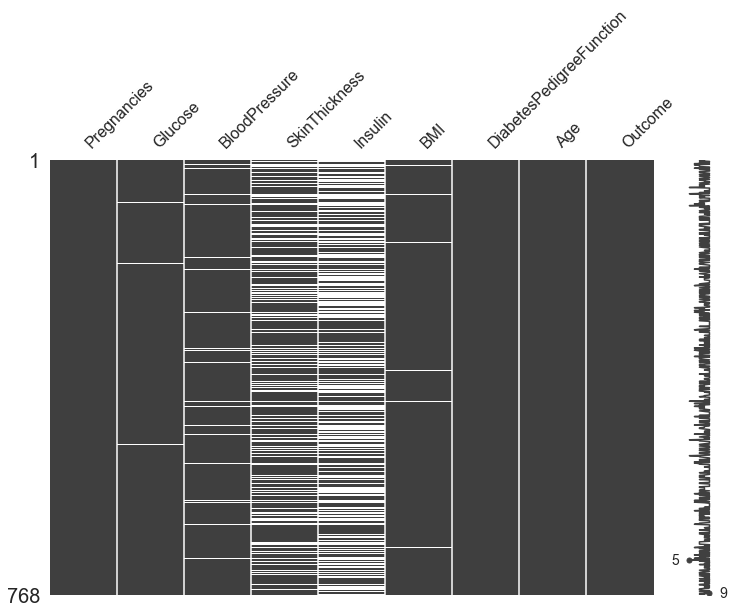

In [80]:
mno.matrix(data, figsize=(12, 8))

In [81]:
missing_columns=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [82]:
def random_imputation(df, feature):
    number_missing= df[feature].isnull().sum()
    observed_values=df.loc[df[feature].notnull(), feature]
    df.loc[df[feature].isnull(), feature+'_imp']= np.random.choice(observed_values, number_missing, replace=True)
    return df

In [83]:
for feature in missing_columns:
    data[feature+'_imp']= data[feature]
    data= random_imputation(data, feature)

In [84]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_imp,BloodPressure_imp,SkinThickness_imp,Insulin_imp,BMI_imp
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1,148.0,72.0,35.0,57.0,33.6
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0,85.0,66.0,29.0,44.0,26.6
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1,183.0,64.0,21.0,230.0,23.3
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,89.0,66.0,23.0,94.0,28.1
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,137.0,40.0,35.0,168.0,43.1


### Deterministic Regression Imputation 

In [85]:
det_data= pd.DataFrame(columns=['Det_'+name for name in missing_columns])

for feature in missing_columns:
    det_data['Det_'+feature]= data[feature+'_imp']
    parameters= list(set(data.columns)- set(missing_columns)-{feature+'_imp'})
    
    model= linear_model.LinearRegression()
    model.fit(X=data[parameters], y=data[feature+'_imp'])
    
    det_data.loc[data[feature].isnull(), 'Det_'+feature]= model.predict(data[parameters])[data[feature].isnull()]

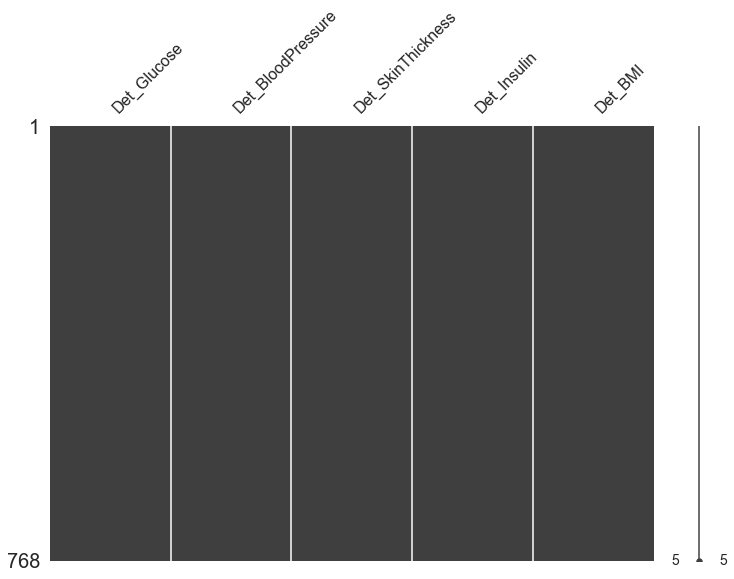

In [86]:
mno.matrix(det_data, figsize=(12, 8))

c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


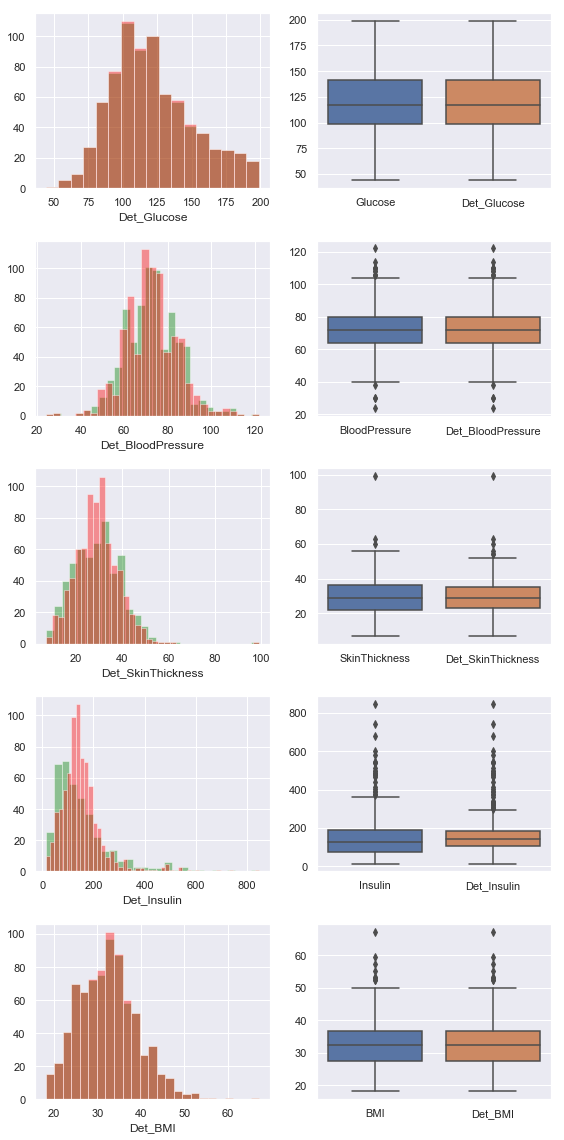

In [87]:
sns.set()
fig, ax= plt.subplots(nrows= 5, ncols=2)
fig.set_size_inches(8,16)

for index, variable in enumerate(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']):
    sns.distplot(data[variable].dropna(), kde=False, ax= ax[index, 0], color='green')
    sns.distplot(det_data['Det_'+variable], kde=False, ax=ax[index, 0], color='red')
    
    sns.boxplot(data= pd.concat([data[variable], det_data['Det_'+variable]], axis=1), ax= ax[index, 1])
    
plt.tight_layout()

In [88]:
pd.concat([data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']], 
           det_data[['Det_Glucose', 'Det_BloodPressure', 'Det_SkinThickness', 'Det_Insulin', 'Det_BMI']]], axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
Glucose,763.0,121.686763,30.535641,44.0,99.0000,117.0,141.0,199.0
BloodPressure,733.0,72.405184,12.382158,24.0,64.0000,72.0,80.0,122.0
SkinThickness,541.0,29.153420,10.476982,7.0,22.0000,29.0,36.0,99.0
Insulin,394.0,155.548223,118.775855,14.0,76.2500,125.0,190.0,846.0
BMI,757.0,32.457464,6.924988,18.2,27.5000,32.3,36.6,67.1
Det_Glucose,768.0,121.678999,30.486139,44.0,99.0000,117.0,141.0,199.0
Det_BloodPressure,768.0,72.370070,12.155594,24.0,64.0000,72.0,80.0,122.0
Det_SkinThickness,768.0,29.075704,9.230779,7.0,23.0000,29.0,35.0,99.0
Det_Insulin,768.0,154.955072,89.324977,14.0,105.4088,140.0,182.0,846.0
Det_BMI,768.0,32.466035,6.881350,18.2,27.5000,32.3,36.6,67.1


In [89]:
random_data = pd.DataFrame(columns = ["Ran_" + name for name in missing_columns])

for feature in missing_columns:
        
    random_data["Ran_" + feature] = data[feature + '_imp']
    parameters = list(set(data.columns) - set(missing_columns) - {feature + '_imp'})
    
    model = linear_model.LinearRegression()
    model.fit(X = data[parameters], y = data[feature + '_imp'])
    
    #Standard Error of the regression estimates is equal to std() of the errors of each estimates
    predict = model.predict(data[parameters])
    std_error = (predict[data[feature].notnull()] - data.loc[data[feature].notnull(), feature + '_imp']).std()
    
    #observe that I preserve the index of the missing data from the original dataframe
    random_predict = np.random.normal(size = data[feature].shape[0], 
                                      loc = predict, 
                                      scale = std_error)
    random_data.loc[(data[feature].isnull()) & (random_predict > 0), "Ran_" + feature] = random_predict[(data[feature].isnull()) & 
                                                                            (random_predict > 0)]

c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


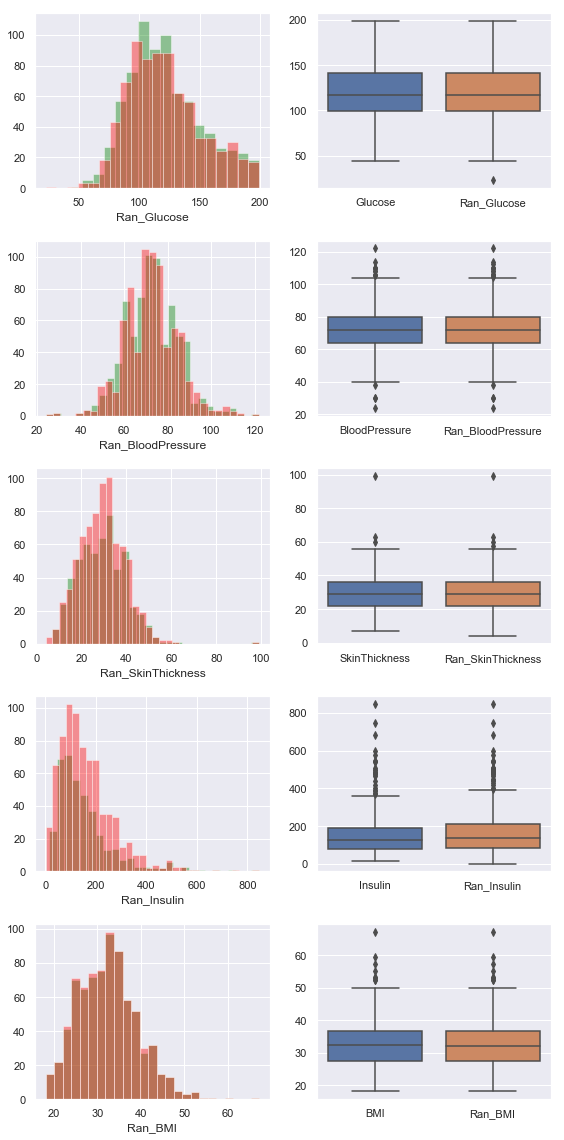

In [91]:
sns.set()
fig, ax= plt.subplots(nrows= 5, ncols=2)
fig.set_size_inches(8,16)

for index, variable in enumerate(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']):
    sns.distplot(data[variable].dropna(), kde=False, ax= ax[index, 0], color='green')
    sns.distplot(random_data['Ran_'+variable], kde=False, ax=ax[index, 0], color='red')
    
    sns.boxplot(data= pd.concat([data[variable], random_data['Ran_'+variable]], axis=1), ax= ax[index, 1])
    
plt.tight_layout()

In [93]:
pd.concat([data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']], 
           random_data[['Ran_Glucose', 'Ran_BloodPressure', 'Ran_SkinThickness', 'Ran_Insulin', 'Ran_BMI']]], axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
Glucose,763.0,121.686763,30.535641,44.000000,99.000,117.00000,141.000000,199.0
BloodPressure,733.0,72.405184,12.382158,24.000000,64.000,72.00000,80.000000,122.0
SkinThickness,541.0,29.153420,10.476982,7.000000,22.000,29.00000,36.000000,99.0
Insulin,394.0,155.548223,118.775855,14.000000,76.250,125.00000,190.000000,846.0
BMI,757.0,32.457464,6.924988,18.200000,27.500,32.30000,36.600000,67.1
Ran_Glucose,768.0,121.563469,30.759006,22.941689,99.000,117.00000,141.000000,199.0
Ran_BloodPressure,768.0,72.517217,12.506946,24.000000,64.000,72.00000,80.000000,122.0
Ran_SkinThickness,768.0,29.117468,10.016514,4.159639,22.000,29.00000,36.000000,99.0
Ran_Insulin,768.0,161.341688,109.176550,1.689453,85.000,135.28606,208.500044,846.0
Ran_BMI,768.0,32.437142,6.923569,18.200000,27.475,32.25000,36.600000,67.1
